# Vamos a utilizar un dataset de perros y gatos para explorar técnicas de Data Augmentation

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [2]:
import tensorflow as tf
from tensorflow import keras

### DATASET:

El Dataset contiene 4000 imágenes de gatos y perros (2000 gatos y 2000 perros). Vamos a usar 2000 imágenes para entrenar, 1000 para validación, 1000 para test.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
#subir el archivo perros_y_gatos.zip
# está acá: https://drive.google.com/file/d/1WgbH_Xt421hNhD4gcfwsvtVsFheJKefm/view?usp=sharing\
!gdown --id 1WgbH_Xt421hNhD4gcfwsvtVsFheJKefm

Downloading...
From: https://drive.google.com/uc?id=1WgbH_Xt421hNhD4gcfwsvtVsFheJKefm
To: /content/perros_y_gatos.zip
90.8MB [00:00, 105MB/s] 


In [4]:
!unzip /content/perros_y_gatos.zip > /dev/null

In [5]:
!ls

perros_y_gatos.zip  sample_data  test  train  validation


In [6]:
cd /content

/content


In [7]:
train_dir = './train'
validation_dir = './validation'
test_dir = './test'

### Preprocesamiento de los datos

* Leer las imágenes
* Decodificar los JPEG en imágenes de píxeles RGB
* Convertir estas imágenes en tensores de valores en punto flotante
* Reescalar los valores de los píxeles al intervalo [0,1]


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Link : https://keras.io/preprocessing/image/

In [14]:
# Así generamos batches desde los directorios de imágenes
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# i = 1
# for batch in train_datagen.flow(train_generator, batch_size=1,
#                           save_to_dir='.', save_prefix='img', save_format='jpeg'):
#     i += 1
#     if i > 6:
#         break

# import matplotlib.image as mpimg
# import glob
# import os

# files =glob.glob("./*.jpeg")
# plt.figure(figsize=(10,5))
# i = 1
# for f in files:
#     if i > 6:
#         break 
#     plt.subplot(2,3,i)
#     image = mpimg.imread(f)
#     plt.imshow(image)
#     i+=1
#     os.remove(f)
    
# plt.show()

In [ ]:
!ls

perros_y_gatos.zip  sample_data  test  train  validation


In [8]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32,kernel_size=(3,3), padding='valid',activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.Conv2D(filters=128,kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.Conv2D(filters=128,kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=512,activation='relu'))
model.add(layers.Dense(units=1,activation='relu'))


#### COMPLETAR #####
# agregar las siguientes capas:
# convolucional f=(3,3), # de filtros: 32, activación relu
# max pooling f=2, s=2
# convolucional f=(3,3), # de filtros: 64, activación relu
# max pooling f=2, s=2
# convolucional f=(3,3), # de filtros: 128, activación relu
# max pooling f=2, s=2
# convolucional f=(3,3), # de filtros: 128, activación relu
# max pooling f=2, s=2
# capa flatten
# capa densa de 512 elementos activación relu
# capa densa con un output de 1 elemento con activación sigmoidea


In [ ]:
model.summary()

ValueError: ignored

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
from tensorflow.keras import optimizers

# compilar el modelo con binary_crossentropy y optimizador RMSprop con
# learning rate 1e-4, la métrica a usar es la accuracy (acc)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
# utilizar model.fit_generator para entrenar
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
100/100 [==============================] - 93s 931ms/step - loss: 0.7911 - acc: 0.5460 - val_loss: 0.6635 - val_acc: 0.6010
Epoch 2/5
100/100 [==============================] - 93s 928ms/step - loss: 0.6646 - acc: 0.6125 - val_loss: 0.6208 - val_acc: 0.6660
Epoch 3/5
100/100 [==============================] - 93s 929ms/step - loss: 0.6303 - acc: 0.6755 - val_loss: 1.5441 - val_acc: 0.5210
Epoch 4/5
100/100 [==============================] - 93s 927ms/step - loss: 0.5784 - acc: 0.7065 - val_loss: 0.6084 - val_acc: 0.6900
Epoch 5/5
100/100 [==============================] - 93s 927ms/step - loss: 0.5529 - acc: 0.7345 - val_loss: 0.6547 - val_acc: 0.6560


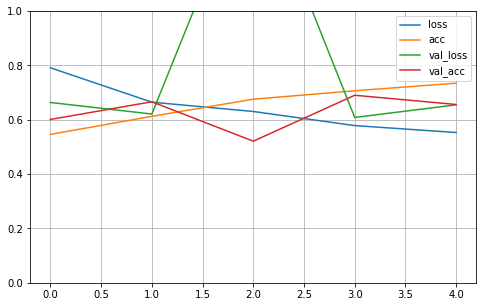

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
from tensorflow.keras import backend as K 

K.clear_session()
del model

### DATA AUGMENTATION

Distorsión, Rotación, Crop, Flip horizontal: 
![image.png](attachment:image.png)

Vamos a distorsionar (estirando y escalando), rotar las imágenes, invertirlas horizontalmente, hacer zoom en una región, esto va a ser aleatorio dentro de un cierto rango, utilizar ImageDataGenerator con parámetros para que esto ocurra.

https://keras.io/api/preprocessing/image/

https://github.com/keras-team/keras-preprocessing/blob/master/keras_preprocessing/image/image_data_generator.py

https://github.com/keras-team/keras-preprocessing/blob/master/keras_preprocessing/image/affine_transformations.py

usar:

- rotation_range -> rango aleatorio de angulo de rotacions
- width_shift_range -> rango aleatorio de desplazamiento en x expresado como proporcion de la imagen [0,1]
- height_shift_range -> rango aleatorio de desplazamiento en y expresado como proporcion de la imagen [0,1]
- shear_range -> rango aleatorio de 'shear' o cillamiento https://en.wikipedia.org/wiki/Shear_mapping [0,1]
- zoom_range -> rango aleatorio de zoom de la imagen [0,1]
- horizontal_flip -> boolean (si se flipea aleatoriamente la imagen en la dirección horizontal)

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./255
    )

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=128,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=64,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Veamos algunas imágenes

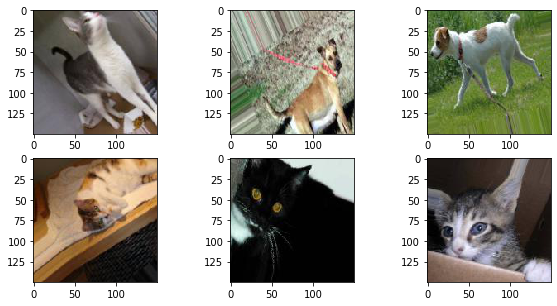

In [ ]:
# i = 1
# for batch in train_datagen.flow(train_generator, batch_size=1,
#                           save_to_dir='.', save_prefix='img', save_format='jpeg'):
#     i += 1
#     if i > 6:
#         break

# import matplotlib.image as mpimg
# import glob
# import os

# files =glob.glob(".\*.jpeg")
# plt.figure(figsize=(10,5))
# i = 1
# for f in files:
#     if i > 6:
#         break 
#     plt.subplot(2,3,i)
#     image = mpimg.imread(f)
#     plt.imshow(image)
#     i+=1
#     os.remove(f)
    
# plt.show()

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(filters=32,kernel_size=(3,3), padding='valid',activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(layers.Conv2D(filters=64,kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(layers.Conv2D(filters=128,kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(layers.Conv2D(filters=128,kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(units=512,activation='relu'))
model.add(layers.Dense(units=1,activation='relu'))

#### COMPLETAR #####
### usar el mismo modelo de antes

# agregar las siguientes capas:
# convolucional f=(3,3), # de filtros: 32, activación relu
# max pooling f=2, s=2
# convolucional f=(3,3), # de filtros: 64, activación relu
# max pooling f=2, s=2
# convolucional f=(3,3), # de filtros: 128, activación relu
# max pooling f=2, s=2
# convolucional f=(3,3), # de filtros: 128, activación relu
# max pooling f=2, s=2
# capa flatten
# capa densa de 512 elementos activación relu
# capa densa con un output de 1 elemento con activación sigmoidea

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50)

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
keras.backend.clear_session
del model

# Buscando Accuracy para Perros y Gatos

Las redes entrenadas no obtienen buenos resultados. Nunca supera en Validation el 70% mientras que puede verse que el train está overfitteado, obteniendo accuracies de 1. 

Debe explorarse un poco más con la arquitectura de la red y data augmentation.

In [12]:
from keras import layers, losses, optimizers

In [13]:
input = layers.Input(shape=(150,150,3),name = 'InputLayer')

In [14]:
cv1 = layers.Conv2D(filters=8,kernel_size=(3,3),strides=1,padding='valid',activation='relu',name='conv1')(input) # output (144,144,8)
pool1 = layers.AvgPool2D(pool_size=(2,2),strides=1,name='pool1')(cv1) # output (72,72,8)

In [15]:
cv2 = layers.Conv2D(filters=16,kernel_size=(5,5),strides=1,padding='valid',activation='relu',name='conv2')(pool1) # output (68,68,128)
pool2 = layers.AvgPool2D(pool_size=(2,2),strides=1,name='pool2')(cv2) # output (34,34,128)

In [16]:
cv3 = layers.Conv2D(filters=32,kernel_size=(3,3),strides=(2,2),padding='valid',activation='relu',name='conv3')(pool2) # output (16,16,576)
pool3 = layers.AvgPool2D(pool_size=(4,4),strides=(4,4),name='pool3')(cv3) # output (4,4,576)

In [17]:
flatten = layers.Flatten(name='FlattenLayer')(pool3)

In [18]:
fc1 = layers.Dense(units=500,activation='relu',name='FirstDense')(flatten)

In [19]:
#dropout = layers.Dropout(rate=0.5,seed=12,name='dropout')(fc1)

In [20]:
fc2 = layers.Dense(units=100,activation='relu',name='SecondDense')(fc1)

In [21]:
outputlayer = layers.Dense(units=1,activation='sigmoid',name='prediction')(fc2)

In [22]:
model = keras.models.Model(inputs=input,outputs=outputlayer)

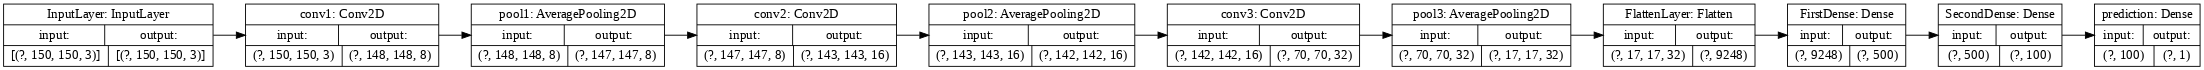

In [23]:
keras.utils.plot_model(model=model,rankdir='LR',dpi=65,show_shapes=True)

In [24]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.0005),loss=losses.BinaryCrossentropy(),metrics=['accuracy'])

In [25]:
history2= model.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=250,
      validation_data=validation_generator,
      validation_steps=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/250
10/10 [==============================] - 4s 424ms/step - loss: 0.7129 - accuracy: 0.4968 - val_loss: 0.6986 - val_accuracy: 0.4219
Epoch 2/250
10/10 [==============================] - 4s 398ms/step - loss: 0.6890 - accuracy: 0.5398 - val_loss: 0.6883 - val_accuracy: 0.5312
Epoch 3/250
10/10 [==============================] - 4s 414ms/step - loss: 0.6825 - accuracy: 0.5516 - val_loss: 0.6787 - val_accuracy: 0.5469
Epoch 4/250
10/10 [==============================] - 4s 399ms/step - loss: 0.6725 - accuracy: 0.5950 - val_loss: 0.6507 - val_accuracy: 0.6406
Epoch 5/250
10/10 [==============================] - 4s 414ms/step - loss: 0.6579 - accuracy: 0.6016 - val_loss: 0.6706 - val_accuracy: 0.5781
Epoch 6/250
10/10 [==============================] - 4s 412ms/step - loss: 0.6481 - accuracy: 0.6164 - val_loss: 0.6498 - val_accuracy: 0.5938
Epoch 7/250
10/10 [==============================] - 4s 410ms/step

KeyboardInterrupt: ignored

In [91]:
history1= model.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=250,
      validation_data=validation_generator,
      validation_steps=1)

Epoch 1/250
10/10 [==============================] - 4s 369ms/step - loss: 0.6934 - accuracy: 0.4935 - val_loss: 0.6929 - val_accuracy: 0.5156
Epoch 2/250
10/10 [==============================] - 4s 353ms/step - loss: 0.6931 - accuracy: 0.5057 - val_loss: 0.6936 - val_accuracy: 0.4844
Epoch 3/250
10/10 [==============================] - 4s 357ms/step - loss: 0.6932 - accuracy: 0.4968 - val_loss: 0.6940 - val_accuracy: 0.4688
Epoch 4/250
10/10 [==============================] - 4s 355ms/step - loss: 0.6937 - accuracy: 0.4740 - val_loss: 0.6937 - val_accuracy: 0.5312
Epoch 5/250
10/10 [==============================] - 4s 360ms/step - loss: 0.6926 - accuracy: 0.5203 - val_loss: 0.6972 - val_accuracy: 0.3750
Epoch 6/250
10/10 [==============================] - 4s 362ms/step - loss: 0.6936 - accuracy: 0.4935 - val_loss: 0.6931 - val_accuracy: 0.4375
Epoch 7/250
10/10 [==============================] - 4s 359ms/step - loss: 0.6928 - accuracy: 0.5073 - val_loss: 0.6930 - val_accuracy: 0.5156

# LeNet for MNIST

In [ ]:
mnist = keras.datasets.mnist

In [ ]:
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
(x_train, y_train), (x_test, y_test) = (x_train/255., y_train), (x_test/255., y_test)

In [ ]:
!nvidia-smi

Sun Nov  1 01:16:43 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
inputs = keras.layers.Input(shape=(28,28,1), name='input_layer')

In [ ]:
conv1 = keras.layers.Conv2D(filters=6,kernel_size=(5,5),strides=1,padding='same',activation='tanh')(inputs)

In [ ]:
pool1 = keras.layers.AvgPool2D(pool_size=(2,2),strides=2)(conv1)

In [ ]:
conv2 = keras.layers.Conv2D(filters=16,kernel_size=(5,5),activation='tanh')(pool1)

In [ ]:
pool2 = keras.layers.AvgPool2D(pool_size=(2,2),strides=2)(conv2)

In [ ]:
conv3 = keras.layers.Conv2D(filters=120,kernel_size=(5,5),activation='tanh')(pool2)

In [ ]:
flatten_c3 = keras.layers.Flatten()(conv3)

In [ ]:
fc1 = keras.layers.Dense(units=84,activation='tanh')(flatten_c3)

In [ ]:
output = keras.layers.Dense(units=10,activation='softmax')(fc1)

In [ ]:
LeNet = keras.models.Model(inputs=inputs,outputs=output,name='LeNet')

In [ ]:
LeNet.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history_LeNet = LeNet.fit(x=x_train,y=y_train,batch_size=256,epochs=25,shuffle=True)

Epoch 1/25
235/235 [==============================] - 1s 4ms/step - loss: 0.2448 - accuracy: 0.9288
Epoch 2/25
235/235 [==============================] - 1s 3ms/step - loss: 0.2363 - accuracy: 0.9312
Epoch 3/25
235/235 [==============================] - 1s 4ms/step - loss: 0.2283 - accuracy: 0.9332
Epoch 4/25
235/235 [==============================] - 1s 4ms/step - loss: 0.2208 - accuracy: 0.9356
Epoch 5/25
235/235 [==============================] - 1s 3ms/step - loss: 0.2135 - accuracy: 0.9374
Epoch 6/25
235/235 [==============================] - 1s 3ms/step - loss: 0.2066 - accuracy: 0.9395
Epoch 7/25
235/235 [==============================] - 1s 3ms/step - loss: 0.2001 - accuracy: 0.9414
Epoch 8/25
235/235 [==============================] - 1s 4ms/step - loss: 0.1939 - accuracy: 0.9434
Epoch 9/25
235/235 [==============================] - 1s 3ms/step - loss: 0.1879 - accuracy: 0.9451
Epoch 10/25
235/235 [==============================] - 1s 3ms/step - loss: 0.1822 - accuracy: 0.9463

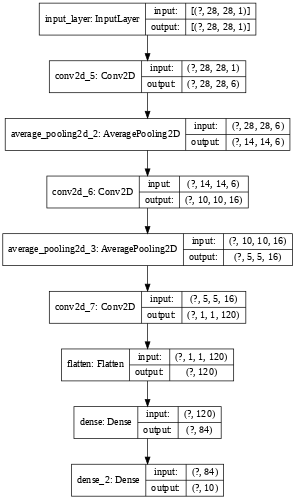

In [ ]:
keras.utils.plot_model(model=LeNet,rankdir='TB',show_shapes=True,dpi=50)

In [ ]:
LeNet.evaluate(x=x_test,y=y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1111 - accuracy: 0.9678


[0.11108182370662689, 0.9678000211715698]